# Liver Disease Prediction

# Importing Libararies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings; warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
ilpd = pd.read_csv('indian_liver_patient.csv')

# EXploratory Data Analysis (EDA)

In [3]:
ilpd.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
ilpd.shape

(583, 11)

In [5]:
list(ilpd)
#ilpd.columns

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

The dataset contains 583 instances, 8 biological parameters, 2 demographic paramenters (Age and Gender) and 1 target value. Target value "Dataset" contains 1 for positive cases and 2 for negative cases.

In [6]:
ilpd.rename(columns = {'Dataset':'liver_disease'}, inplace=True)

In [7]:
ilpd.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
liver_disease                   2
dtype: int64

In [8]:
ilpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


All the independent variables are numerical, except from Gender attribute with is categorical.

**Descriptive Statistics**

In the dataframe below we can see some fundamental statistical measures such as: mean, std, min, max, quantiles ect.

In [9]:
#ilpd.describe().transpose()
ilpd.iloc[:,:-1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


**Checking Missing Values**

In [10]:
ilpd.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
liver_disease                 0
dtype: int64

There is only a small percentage of missing values in the dataset. Also, only the feature Albumin_and_Globulin_Ratio contains missing values. We will replace missing values with '?'

In [11]:
ilpd.fillna('?', inplace = True)

In [12]:
ilpd[ilpd["Albumin_and_Globulin_Ratio"] == '?']

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,?,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,?,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,?,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,?,2


Despite the small percentage of missing values in the dataset, we are going to replace them with class mean. We will find the mean class value of each missing value and we will use it to replace it.

In [13]:
ilpd_without_missing = ilpd[ilpd["Albumin_and_Globulin_Ratio"] != '?']

In [63]:
ilpd_without_missing_class_1 = ilpd_without_missing[ilpd_without_missing['liver_disease'] == 1]
mean_dataset_class_1 = round(ilpd_without_missing_class_1[ilpd_without_missing_class_1['liver_disease'] == 1]['Albumin_and_Globulin_Ratio'].mean(),1)
print('mean value of Albumin_and_Globulin_Ratio in class 1: {}'.format(mean_dataset_class_1))

mean value of Albumin_and_Globulin_Ratio in class 1: 0.9


Mean value calculation for Albumin_and_Globulin_Ratio feature for class 1 (positive)

Mean value for feature Albumin_and_Globulin_Ratio for class 2 (negative)

In [16]:
ilpd_without_missing_class_2 = ilpd_without_missing[ilpd_without_missing['liver_disease'] == 2]
mean_dataset_class_2 = round(ilpd_without_missing_class_2[ilpd_without_missing_class_2['liver_disease'] == 2]['Albumin_and_Globulin_Ratio'].mean(),1)
print('mean value of Albumin_and_Globulin_Ratio in class 2: {}'.format(mean_dataset_class_2))

mean value of Albumin_and_Globulin_Ratio in class 2: 1.0


**Replace missing values**

In [17]:
ilpd[ilpd["Albumin_and_Globulin_Ratio"] == '?']

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,?,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,?,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,?,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,?,2


In [18]:
ilpd['Albumin_and_Globulin_Ratio'][209] = mean_dataset_class_1
ilpd['Albumin_and_Globulin_Ratio'][241] = mean_dataset_class_1
ilpd['Albumin_and_Globulin_Ratio'][253] = mean_dataset_class_2
ilpd['Albumin_and_Globulin_Ratio'][312] = mean_dataset_class_2

In [20]:
ilpd['Gender'] = ilpd['Gender'].map({'Male': 1, 'Female': 2})

# Correlation Analysis

In [21]:
ilpd.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,liver_disease
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.161388
liver_disease,-0.137351,0.082416,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,1.000000


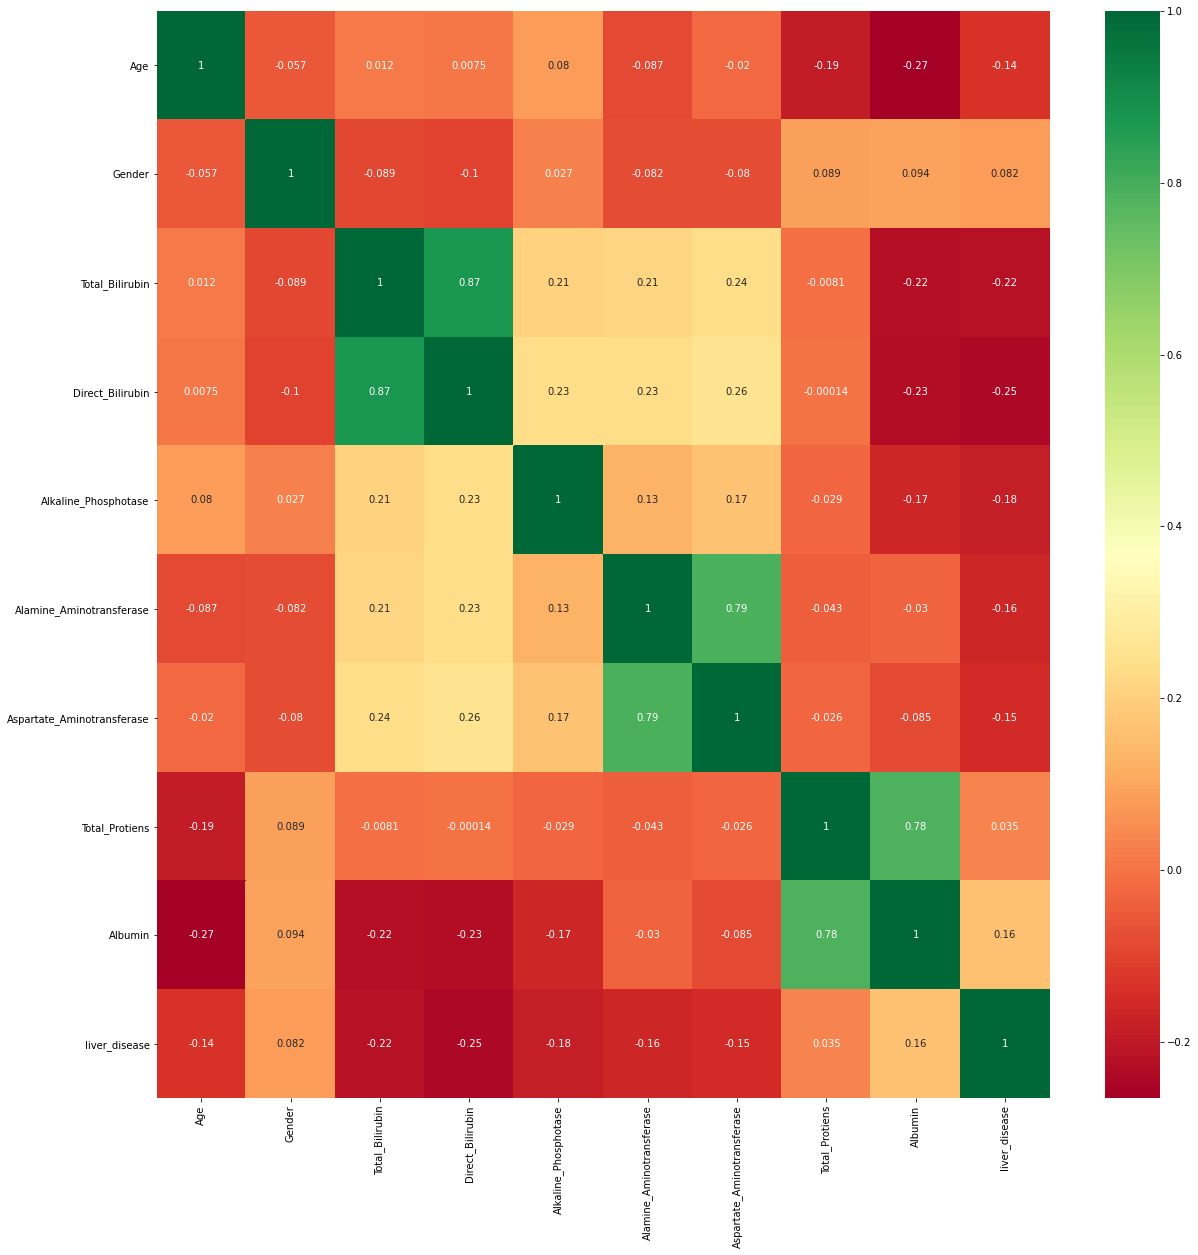

In [22]:
#get correlations of each features in dataset

corrmat = ilpd.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
#plot heat map
g=sns.heatmap(ilpd[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
ilpd.corr()["liver_disease"].sort_values(ascending = False)

liver_disease                 1.000000
Albumin                       0.161388
Gender                        0.082416
Total_Protiens                0.035008
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: liver_disease, dtype: float64

In [24]:
y = ilpd['liver_disease']     # Dependent / Target Attribute

X = ilpd.drop('liver_disease', axis=1) # Independetn/ Input

# Feature Selection

There are various feature extraction techniques in data science which are categorized into 2 parts: 
1. Wrapper methods
2. Embedded methods

We have implemented few of the above techniques to verify importance of features and selecting them based on the accuracy of various algorithms.

#### 1. Wrapper Method- Recursive Feature Elimination Method

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

RFE attempts to eliminate dependencies and collinearity that may exist in the model.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [25]:
### use a baseline classifier logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
lr_model = log_reg.fit(X, y)

In [26]:
# Implement RFE on base model
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lr_model, step=1)
### fit the rfe function for ranking
rfe = rfe.fit(X, y)

In [27]:
rfe.support_

array([False,  True, False,  True, False, False, False,  True,  True,
        True])

In [28]:
rfe.ranking_

array([3, 1, 2, 1, 6, 4, 5, 1, 1, 1])

**Important Features:**
- 'Gender',
- 'Direct_Bilirubin',
- 'Total_Protiens',
- 'Albumin',
- 'Albumin_and_Globulin_Ratio',
- 'Total_Bilirubin',
- 'Age',
- 'Alamine_Aminotransferase'

#### 2. Embedded Method- Decision Tree Regressor (CART)

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Create model first then fit the data with all features
cart_model = DecisionTreeRegressor()
cart_tree = cart_model.fit(X, y)
imp_feature = cart_tree.feature_importances_

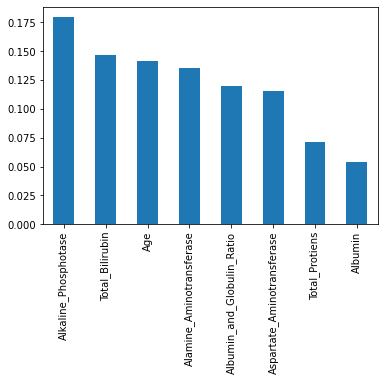

In [30]:
# Now Check the important features with higher score value
# check summary
feature_val = pd.Series(imp_feature, index = X.columns)

# draw chart of important feature
feature_val.nlargest(8).plot(kind='bar')
plt.show()

**Important Features:**
- 'Age',
- 'Total_Bilirubin',
- 'Alamine_Aminotransferase',
- 'Total_Protiens',
- 'Alkaline_Phosphotase',
- 'Albumin_and_Globulin_Ratio'
- 'Albumin',
- 'Direct_Bilirubin'

### Selected Features

After analyzing the two results of two feature selection methods, we concluded that below are the important features based on their occurrences and comparison in each method:

**Important Features:**
- 'Age',
- 'Albumin',
- 'Direct_Bilirubin'
- 'Total_Protiens',
- 'Total_Bilirubin',
- 'Alamine_Aminotransferase',
- 'Albumin_and_Globulin_Ratio'

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=300,shuffle=True)

In [32]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408, 10)

(175, 10)

(408,)

(175,)

# Building ML Model

## ITERATION - 01 : Building Model with ALL Attributes

### 1. Decision Tree Classification Algorithm

In [33]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier

# creating a model
DT_all = DecisionTreeClassifier()

# feeding the training data into the model
DT_all.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# predicting the values for x-test
y_pred = DT_all.predict(X_test)

#### Performance Measure - Decision Tree with All Attributes

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

print("Performance Measure - Decision Tree with All Attributes\n")
# finding the training and testing accuracy
print("Training Accuracy: ",DT_all.score(X_train, y_train))
print("Testing Accuracy: ", DT_all.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Performance Measure - Decision Tree with All Attributes

Training Accuracy:  1.0
Testing Accuracy:  0.6742857142857143

Confusion Matrix of DT on Training Dataset - 
 [[101  40]
 [ 17  17]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           1       0.86      0.72      0.78       141
           2       0.30      0.50      0.37        34

    accuracy                           0.67       175
   macro avg       0.58      0.61      0.58       175
weighted avg       0.75      0.67      0.70       175

Accuracy: 0.674286
precision: 0.855932
recall: 0.716312
f1: 0.779923
ROC AUC: 0.608156


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

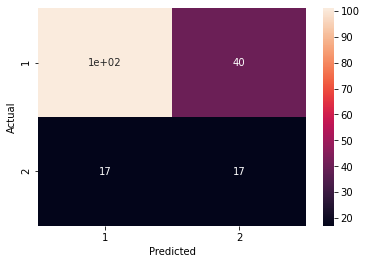

In [36]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

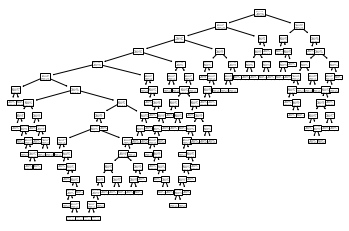

In [37]:
# Once trained, you can plot the tree with the plot_tree function:
from sklearn import tree
tree.plot_tree(DT_all) 
plt.savefig('out.pdf')

### 2. Logistic Regression Classification Algorithm

In [38]:
from sklearn.linear_model import LogisticRegression

lr_all = LogisticRegression()
lr_all = lr_all.fit(X_train,y_train)

In [39]:
# predicting the values for x-test
y_pred = lr_all.predict(X_test)

#### Performance Measure - Logistic Regression with All Attributes

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

print("Performance Measure - Logistic Regression with All Attributes\n")
# finding the training and testing accuracy
print("Training Accuracy: ",lr_all.score(X_train, y_train))
print("Testing Accuracy: ", lr_all.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Performance Measure - Logistic Regression with All Attributes

Training Accuracy:  0.7034313725490197
Testing Accuracy:  0.7314285714285714

Confusion Matrix of DT on Training Dataset - 
 [[114  27]
 [ 20  14]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           1       0.85      0.81      0.83       141
           2       0.34      0.41      0.37        34

    accuracy                           0.73       175
   macro avg       0.60      0.61      0.60       175
weighted avg       0.75      0.73      0.74       175

Accuracy: 0.731429
precision: 0.850746
recall: 0.808511
f1: 0.829091
ROC AUC: 0.610138


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

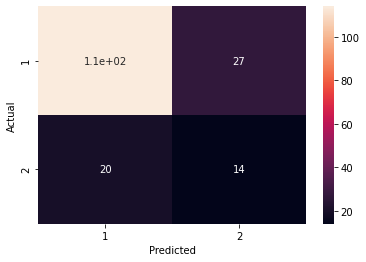

In [41]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

### 3. KNN Classification Algorithm

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_all = KNeighborsClassifier()
knn_all = knn_all.fit(X_train,y_train)

In [43]:
# predicting the values for x-test
y_pred = knn_all.predict(X_test)

#### Performance Measure - KNN with All Attributes

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

print("Performance Measure - KNN with All Attributes\n")
# finding the training and testing accuracy
print("Training Accuracy: ",knn_all.score(X_train, y_train))
print("Testing Accuracy: ", knn_all.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Performance Measure - KNN with All Attributes

Training Accuracy:  0.7916666666666666
Testing Accuracy:  0.68

Confusion Matrix of DT on Training Dataset - 
 [[104  37]
 [ 19  15]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           1       0.85      0.74      0.79       141
           2       0.29      0.44      0.35        34

    accuracy                           0.68       175
   macro avg       0.57      0.59      0.57       175
weighted avg       0.74      0.68      0.70       175

Accuracy: 0.680000
precision: 0.845528
recall: 0.737589
f1: 0.787879
ROC AUC: 0.589383


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

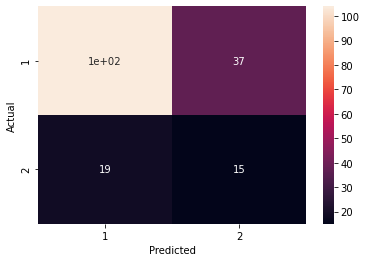

In [45]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

# ITERATION - 02 : Building Model with SELECTED Attributes

**SELECTED Features**

- 'Age',
- 'Albumin',
- 'Direct_Bilirubin'
- 'Total_Protiens',
- 'Total_Bilirubin',
- 'Alamine_Aminotransferase',
- 'Albumin_and_Globulin_Ratio'

Dropping the columns/features which are not required.

In [46]:
##### Dropping not required columns 
X_train.drop(['Gender', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase'], 1 , inplace = True)
X_test.drop(['Gender', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase'], 1 , inplace = True)

In [47]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408, 7)

(175, 7)

(408,)

(175,)

### 4. Decision Tree Classification Algorithm

In [48]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier

# creating a model
DT_sel = DecisionTreeClassifier()

# feeding the training data into the model
DT_sel.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# predicting the values for x-test
y_pred = DT_sel.predict(X_test)

#### Performance Measure - Decision Tree with SELECTED Attributes

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

print("Performance Measure - Decision Tree with SELECTED Attributes\n")
# finding the training and testing accuracy
print("Training Accuracy: ",DT_sel.score(X_train, y_train))
print("Testing Accuracy: ", DT_sel.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Performance Measure - Decision Tree with SELECTED Attributes

Training Accuracy:  1.0
Testing Accuracy:  0.7257142857142858

Confusion Matrix of DT on Training Dataset - 
 [[107  34]
 [ 14  20]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           1       0.88      0.76      0.82       141
           2       0.37      0.59      0.45        34

    accuracy                           0.73       175
   macro avg       0.63      0.67      0.64       175
weighted avg       0.78      0.73      0.75       175

Accuracy: 0.725714
precision: 0.884298
recall: 0.758865
f1: 0.816794
ROC AUC: 0.673550


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

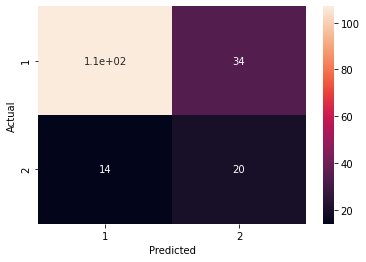

In [51]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

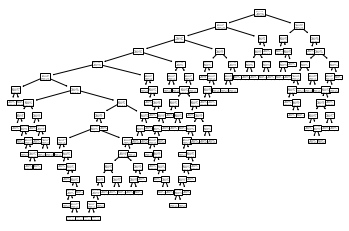

In [52]:
# Once trained, you can plot the tree with the plot_tree function:
from sklearn import tree
tree.plot_tree(DT_all) 
plt.savefig('out.pdf')

### 5. Logistic Regression Classification Algorithm

In [53]:
from sklearn.linear_model import LogisticRegression

lr_sel = LogisticRegression()
lr_sel = lr_sel.fit(X_train,y_train)

In [54]:
# predicting the values for x-test
y_pred = lr_sel.predict(X_test)

#### Performance Measure - Logistic Regression with SELECTED Attributes

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

print("Performance Measure - Logistic Regression with SELECTED Attributes\n")
# finding the training and testing accuracy
print("Training Accuracy: ",lr_sel.score(X_train, y_train))
print("Testing Accuracy: ", lr_sel.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Performance Measure - Logistic Regression with SELECTED Attributes

Training Accuracy:  0.7083333333333334
Testing Accuracy:  0.7257142857142858

Confusion Matrix of DT on Training Dataset - 
 [[116  25]
 [ 23  11]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           1       0.83      0.82      0.83       141
           2       0.31      0.32      0.31        34

    accuracy                           0.73       175
   macro avg       0.57      0.57      0.57       175
weighted avg       0.73      0.73      0.73       175

Accuracy: 0.725714
precision: 0.834532
recall: 0.822695
f1: 0.828571
ROC AUC: 0.573112


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

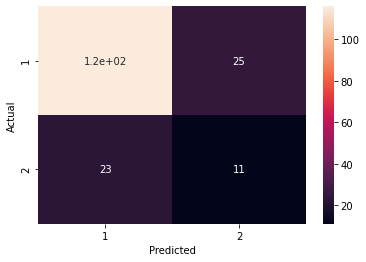

In [56]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

### 6. KNN Classification Algorithm

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_sel = KNeighborsClassifier()
knn_sel = knn_sel.fit(X_train,y_train)

In [58]:
# predicting the values for x-test
y_pred = knn_sel.predict(X_test)

#### Performance Measure - KNN with SELECTED Attributes

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

print("Performance Measure - KNN with SELECTED Attributes\n")
# finding the training and testing accuracy
print("Training Accuracy: ",knn_sel.score(X_train, y_train))
print("Testing Accuracy: ", knn_sel.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Performance Measure - KNN with SELECTED Attributes

Training Accuracy:  0.7769607843137255
Testing Accuracy:  0.6514285714285715

Confusion Matrix of DT on Training Dataset - 
 [[98 43]
 [18 16]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           1       0.84      0.70      0.76       141
           2       0.27      0.47      0.34        34

    accuracy                           0.65       175
   macro avg       0.56      0.58      0.55       175
weighted avg       0.73      0.65      0.68       175

Accuracy: 0.651429
precision: 0.844828
recall: 0.695035
f1: 0.762646
ROC AUC: 0.582812


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

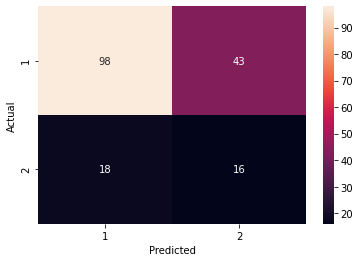

In [60]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

# Evaluating Classification Model

#### Evaluating Classification Algorithms to Answer RQ3:
##### RQ3: Evaluating the best machine learning model by considering the performance factors like accuracy, precision and recall values

## Performance Measure with ALL attributes

**Decision Tree (DT_All)**
- Training Accuracy:  100
- Testing Accuracy:  66.8
- precision: 85.4
- recall: 70.9
- f1: 77.5
- ROC AUC: 60.4

**Logistic Regression (LR_All)**
- Training Accuracy: 70.3
- Testing Accuracy: 73
- precision: 73
- recall: 80.8
- f1: 82.9
- ROC AUC: 61

**KNN (KNN_All)**
- Training Accuracy: 79
- Testing Accuracy: 68
- precision: 84.5
- recall: 73.7
- f1: 78.7
- ROC AUC: 58.9

## Performance Measure with SELECTED attributes

**Decision Tree (DT_Sel)**
- Training Accuracy:  100
- Testing Accuracy:  69.7
- precision: 85
- recall: 75
- f1: 80
- ROC AUC: 61

**Logistic Regression (LR_Sel)**
- Training Accuracy: 70.8
- Testing Accuracy: 72.5
- precision: 83.4
- recall: 82
- f1: 82.8
- ROC AUC: 57

**KNN (KNN-Sel)**
- Training Accuracy: 77.6
- Testing Accuracy: 65
- precision: 84
- recall: 69
- f1: 76
- ROC AUC: 58

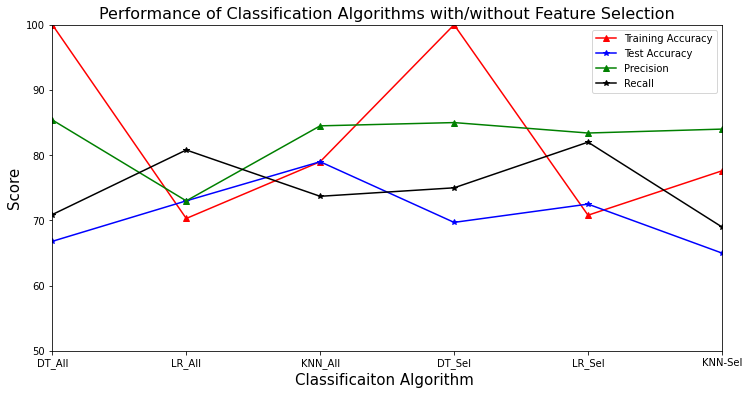

In [61]:
#  plotting the graph for performance of decision trees with different max_depth values
import numpy as np
import matplotlib.pyplot as plt
Model = np.array(['DT_All', 'LR_All', 'KNN_All', 'DT_Sel', 'LR_Sel', 'KNN-Sel'])

Training_Accuracy = np.array([100, 70.3, 79, 100, 70.8, 77.6])
Testing_Accuracy = np.array([66.8, 73, 79, 69.7, 72.5, 65])
Precision = np.array([85.4, 73, 84.5, 85, 83.4, 84])
Recall = np.array([70.9, 80.8, 73.7, 75, 82, 69])

plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(Model, Training_Accuracy, 'r-^', label="Training Accuracy")
plt.plot(Model, Testing_Accuracy, 'b-*', label = "Test Accuracy")
plt.plot(Model, Precision, 'g-^', label = "Precision")
plt.plot(Model, Recall, 'k-*', label = "Recall")

plt.title('Performance of Classification Algorithms with/without Feature Selection', fontsize = 16)
plt.xlim([0, 5])
plt.ylim([50, 100])
plt.xlabel('Classificaiton Algorithm ', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()

plt.show()